# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [187]:
!pip install folium

In [188]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [190]:
!wget -O 'train_hw2.csv' -q 'https://www.dropbox.com/scl/fi/vxs2g5bws0ykezvtc1g9l/train.csv?rlkey=mzpe8e1z08rnjfe14l04pjojd&dl=0'

In [191]:
data = pd.read_csv("train_hw2.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [192]:
data.drop(columns = ['dropoff_datetime'],axis = 1, inplace=True)
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime, format='%Y-%m-%d %H:%M:%S.%f')
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [193]:
#data = data.loc[data['trip_duration'] < 10000]

In [194]:
y = data['trip_duration']

<ipython-input-195-76a0e55c95b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


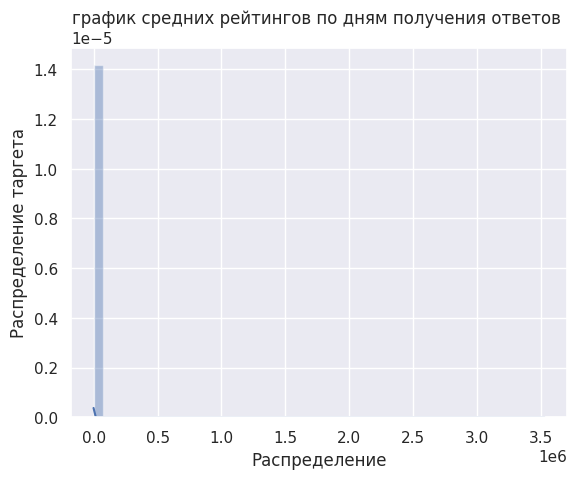

In [195]:
sns.distplot(y)
plt.ylabel('Распределение таргета')
plt.xlabel('Распределение')
plt.title('график средних рейтингов по дням получения ответов ')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: О целевой переменной можно сказать то, что среди ее значений содержатся выбросы, из-за которых мы получили такой странный график


В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?



---


**Ответ**: RMSE более чувствительна к выбросам, но при использовании RMSLE выбросы значительно уменьшаются, а это снижает их влияние на значени ошибки.


---



На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.


---


**Доказательство**:\
1) RMSLE для а: $\sqrt(\frac{1}{n}{\sum}(\log{(a(x_i) + 1)}-\log{(y_i + 1)})^2)$
$\Leftrightarrow$
2) MSE для $\hat{a}$: \


---


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [196]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642


<ipython-input-197-afe59a90d149>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_trip_duration'])


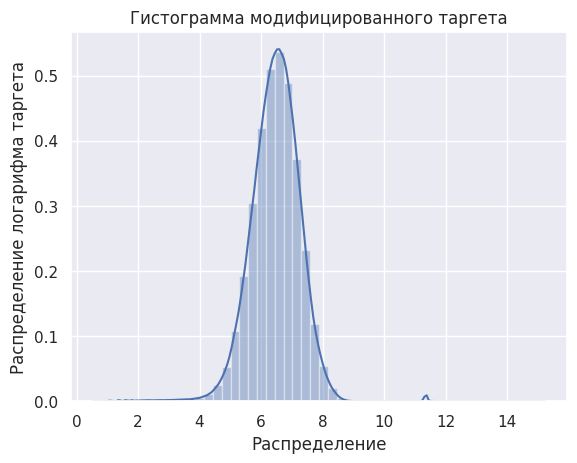

In [197]:
#data.drop(columns = ['trip_duration'],axis = 1, inplace=True) В задании третьей части эта колонка потребуется, а до третьей части она не будет мешать
sns.distplot(data['log_trip_duration'])
plt.ylabel('Распределение логарифма таргета')
plt.xlabel('Распределение')
plt.title('Гистограмма модифицированного таргета')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [198]:
# def rmsle(log1p_y_true, log1p_y_pred):
#     #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#     raise NotImplementedError

# rmsle_best_const = ...
# print(rmsle_best_const)
# assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [199]:
data = data.sort_values(by=['pickup_datetime'])

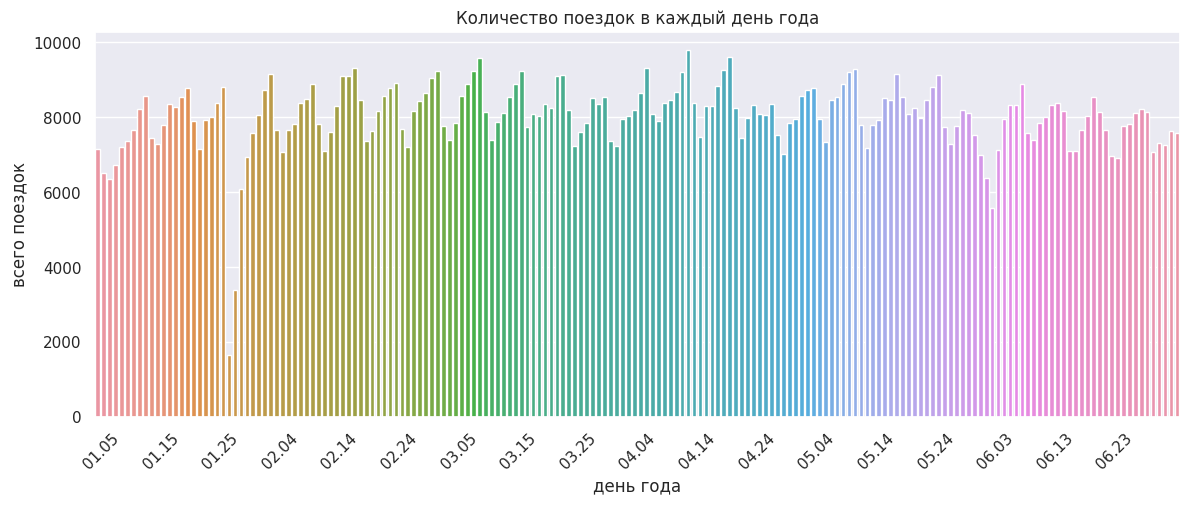

In [200]:
plt.figure(figsize=(14,5))
chart = sns.countplot(x = data['pickup_datetime'].dt.strftime("%m.%d"))
plt.ylabel('всего поездок')
plt.xlabel('день года')
plt.title('Количество поездок в каждый день года')

import matplotlib.dates as mdates

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
locator = mdates.DayLocator(interval=10)
chart.xaxis.set_major_locator(locator)
None

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):



---
Далее будем считать, что периоды, о которых спрашиввается в задании это промежутки более двух дней. Тогда, судя по графику, аномально минимальное число поездок было совершено в 20х числах января и в конце мая. Найдем точные даты:

---



In [201]:
min_per1 = data.groupby(data['pickup_datetime'].dt.strftime("%m.%d")).agg({'id':'count'}).reset_index().iloc[:31,:] # Выводим первые 31 день года(месяц январь)
min_per1[min_per1['id'] == min_per1['id'].min()]

,pickup_datetime,id
22,01.23,1648


In [202]:
min_per2 = data.groupby(data['pickup_datetime'].dt.strftime("%m.%d")).agg({'id':'count'}).reset_index().iloc[121:152,:] # Выводим месяц май
min_per2[min_per2['id'] == min_per2['id'].min()]

,pickup_datetime,id
150,05.30,5570


---
Получаем две даты: 23 января и 30 мая. Почитав гугл, приходим к выводу, что 23 января было анамально низкое число поездок из-за "Запрета автомобильного движения из-за снежной бури", а 30 мая в четырех районах Нью-Йорка была перестрелка.

----


In [203]:
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_fig = data.groupby(data['pickup_datetime'].dt.day_name()).agg({'id':'count'}).reset_index()
week_fig = week_fig.set_index('pickup_datetime').reindex(categories).reset_index()


Text(0.5, 1.0, 'Количество поездок по дням недели')

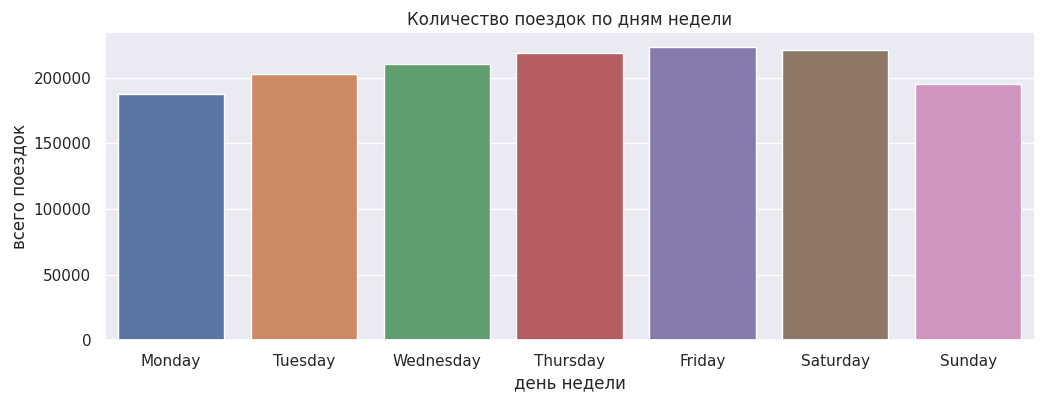

In [204]:
plt.figure(figsize=(12,4))
sns.barplot(x=week_fig['pickup_datetime'], y=week_fig['id'])
plt.ylabel('всего поездок')
plt.xlabel('день недели')
plt.title('Количество поездок по дням недели')

In [205]:
hour_fig = data.groupby(data['pickup_datetime'].dt.strftime("%H")).agg({'id':'count'}).reset_index()
#hour_fig['pickup_datetime'] = pd.to_datetime(hour_fig.pickup_datetime)
hour_fig

,pickup_datetime,id
0,00,53248
1,01,38571
2,02,27972
3,03,20895
4,04,15792
5,05,15002
6,06,33248
7,07,55600
8,08,67053
9,09,67663


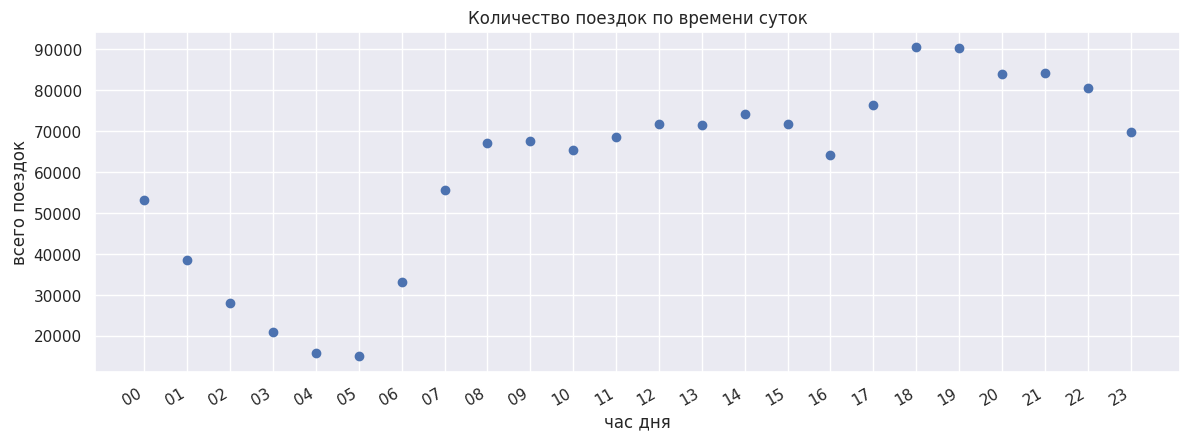

In [206]:
plt.figure(figsize=(14,5))
plt.plot([],[])
plt.scatter(hour_fig['pickup_datetime'], hour_fig['id'])

plt.ylabel('всего поездок')
plt.xlabel('час дня')
plt.title('Количество поездок по времени суток')
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [207]:
month_fig = data.groupby(data['pickup_datetime'].dt.strftime("%Y-%m-%d %H")).agg({'id':'count'}).reset_index()
month_fig['pickup_datetime'] = pd.to_datetime(month_fig.pickup_datetime, format='%Y-%m-%d %H')
month_fig['month'] = month_fig['pickup_datetime'].dt.strftime("%B")
month_fig['hour'] = month_fig['pickup_datetime'].dt.strftime("%H")



#hour_fig['pickup_datetime'] = pd.to_datetime(hour_fig.pickup_datetime)
month_fig

,pickup_datetime,id,month,hour
0,2016-01-01 00:00:00,546,January,00
1,2016-01-01 01:00:00,566,January,01
2,2016-01-01 02:00:00,503,January,02
3,2016-01-01 03:00:00,479,January,03
4,2016-01-01 04:00:00,323,January,04
...,...,...,...,...
4354,2016-06-30 19:00:00,484,June,19
4355,2016-06-30 20:00:00,440,June,20
4356,2016-06-30 21:00:00,484,June,21
4357,2016-06-30 22:00:00,462,June,22


<Figure size 1000x3000 with 0 Axes>

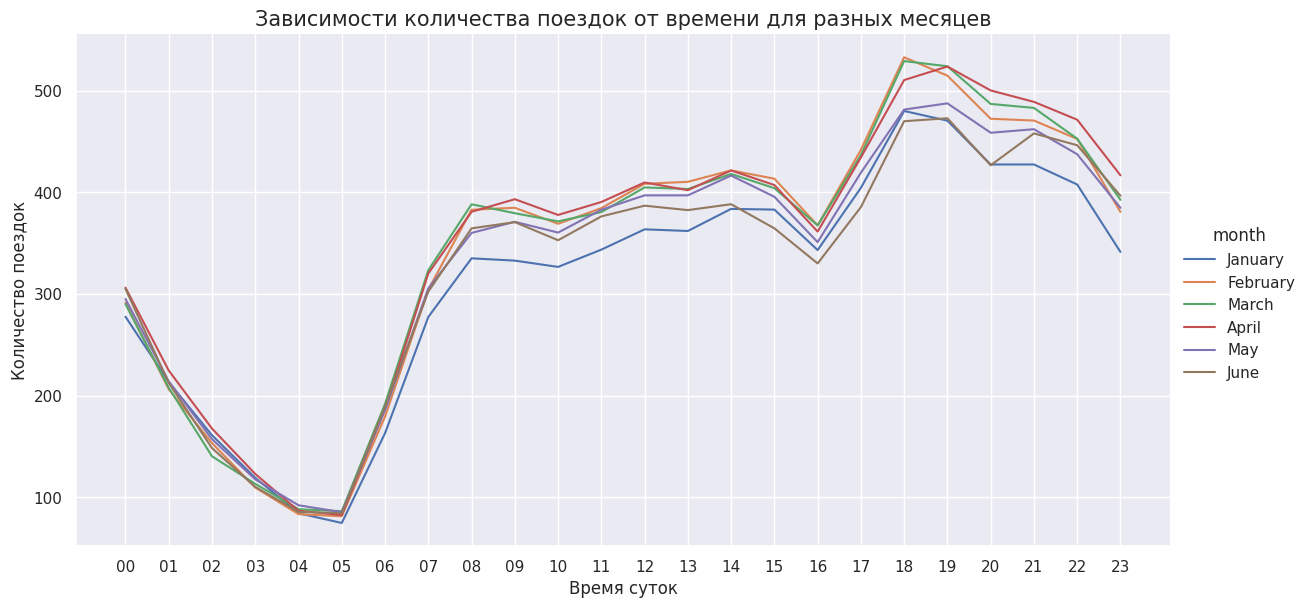

In [208]:
plt.figure(figsize = (10, 30))
sns.relplot(data=month_fig, x="hour", y="id", hue="month", kind='line', height=6, aspect=2, errorbar=None)

plt.title('Зависимости количества поездок от времени для разных месяцев', fontsize=15)

plt.xlabel('Время суток')
plt.ylabel('Количество поездок')


plt.show()

In [209]:
month_fig['month'] = month_fig['pickup_datetime'].dt.strftime("%A")

month_fig = month_fig.rename(columns={'month': 'week_day'})


#hour_fig['pickup_datetime'] = pd.to_datetime(hour_fig.pickup_datetime)
month_fig

,pickup_datetime,id,week_day,hour
0,2016-01-01 00:00:00,546,Friday,00
1,2016-01-01 01:00:00,566,Friday,01
2,2016-01-01 02:00:00,503,Friday,02
3,2016-01-01 03:00:00,479,Friday,03
4,2016-01-01 04:00:00,323,Friday,04
...,...,...,...,...
4354,2016-06-30 19:00:00,484,Thursday,19
4355,2016-06-30 20:00:00,440,Thursday,20
4356,2016-06-30 21:00:00,484,Thursday,21
4357,2016-06-30 22:00:00,462,Thursday,22


<Figure size 1000x3000 with 0 Axes>

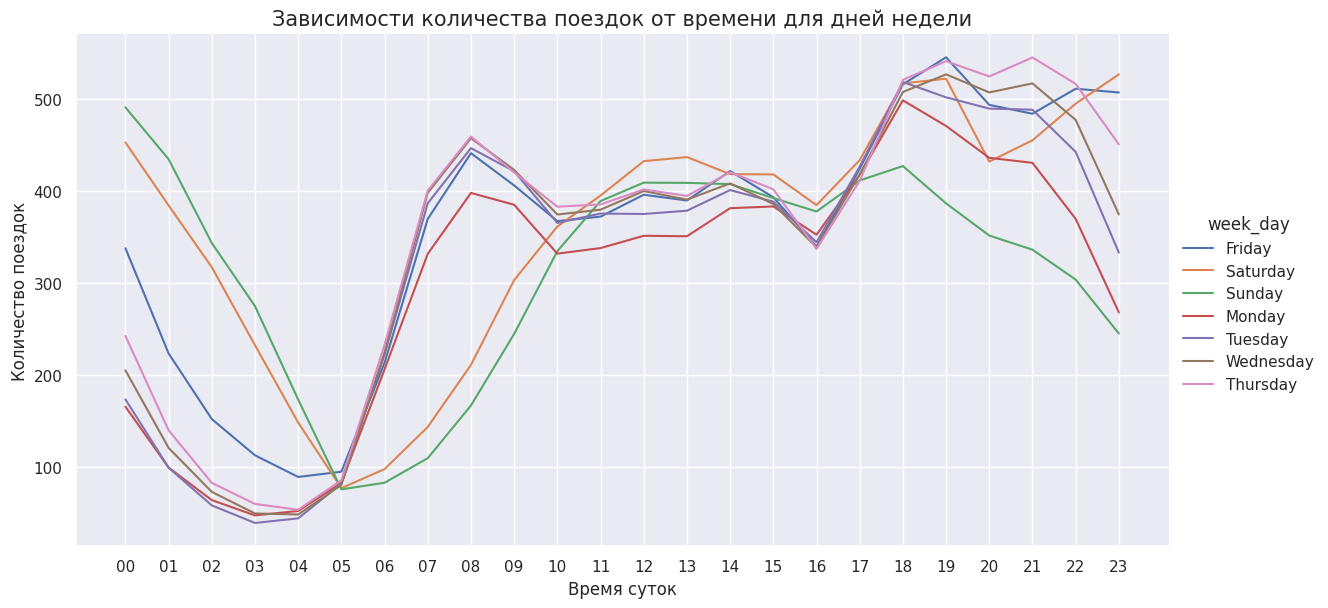

In [210]:
plt.figure(figsize = (10, 30))
sns.relplot(data=month_fig, x="hour", y="id", hue="week_day", kind='line', height=6, aspect=2, errorbar=None)

plt.title('Зависимости количества поездок от времени для дней недели', fontsize=15)

plt.xlabel('Время суток')
plt.ylabel('Количество поездок')


plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


---
Судя по первому графику можно сделать вывод, что в январе в утренние часы в целом вызывают такси меньше, чем в другие месяцы. Но в общем количество такси не зависит от месяца. По второму графику видно, что по субботам и воскресеньям часто вызывают такси по ночам и редко утром, если сравнивать с будними, а динамика со понедельника по пятницу в целом одинаковая. В принципе, результат был предсказуем, так как этот график сопоставим с началом и концом рабочего дня.

---




**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [211]:

#data = data.drop(columns=["id"])
y = data["log_trip_duration"]
X = data.drop(columns=["log_trip_duration"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

X_train = X_train.join(y_train)

Text(0.5, 1.0, 'Зависимости среднего логарифма времени поездки от дня недели')

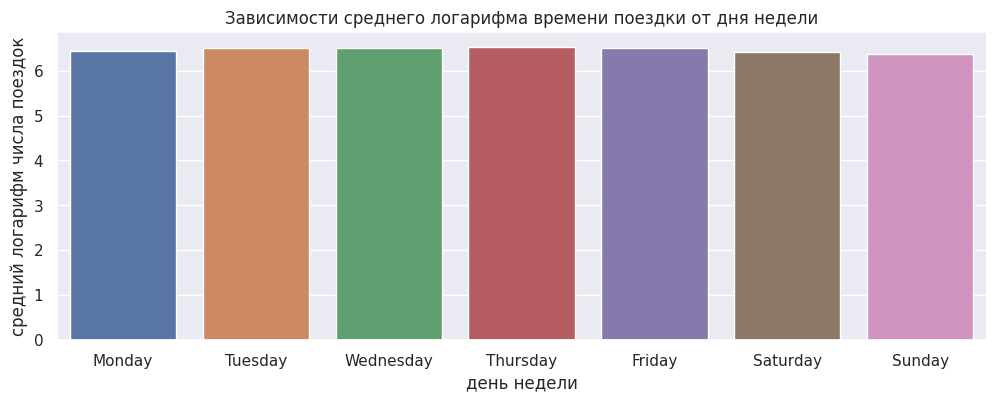

In [212]:
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
log_fig = X_train.groupby(X_train['pickup_datetime'].dt.day_name()).agg({'log_trip_duration':'mean'}).reset_index()
log_fig = log_fig.set_index('pickup_datetime').reindex(categories).reset_index()

plt.figure(figsize=(12,4))
sns.barplot(x=log_fig['pickup_datetime'], y=log_fig['log_trip_duration'])
plt.ylabel('средний логарифм числа поездок')
plt.xlabel('день недели')
plt.title('Зависимости среднего логарифма времени поездки от дня недели')

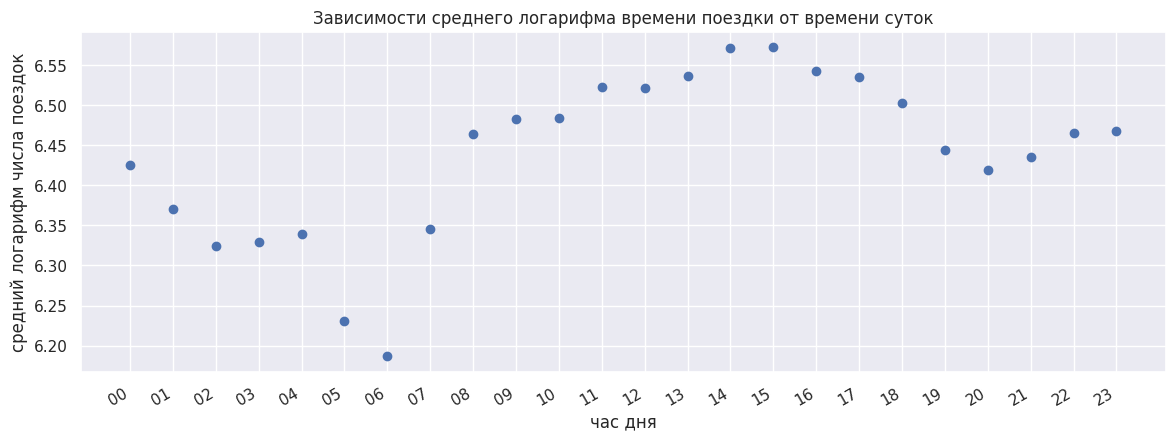

In [213]:
log_fig = X_train.groupby(X_train['pickup_datetime'].dt.strftime("%H")).agg({'log_trip_duration':'mean'}).reset_index()
plt.figure(figsize=(14,5))
plt.plot([],[])
plt.scatter(log_fig['pickup_datetime'], log_fig['log_trip_duration'])

plt.ylabel('средний логарифм числа поездок')
plt.xlabel('час дня')
plt.title('Зависимости среднего логарифма времени поездки от времени суток')
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

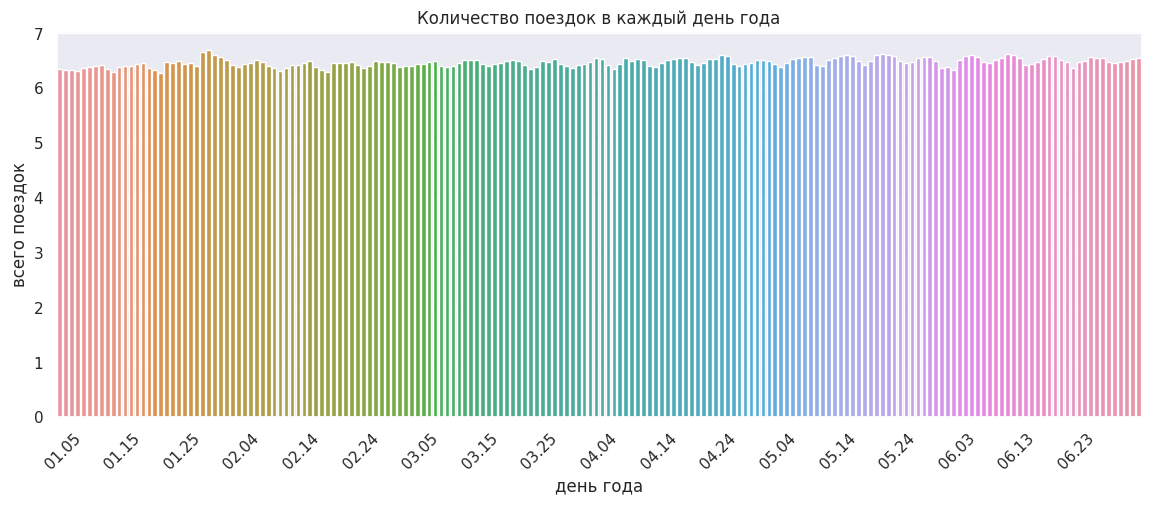

In [214]:
log_fig = X_train.groupby(X_train['pickup_datetime'].dt.strftime("%m.%d")).agg({'log_trip_duration':'mean'}).reset_index()
plt.figure(figsize=(14,5))
chart = sns.barplot(x=log_fig['pickup_datetime'], y=log_fig['log_trip_duration'])
plt.ylabel('всего поездок')
plt.xlabel('день года')
plt.title('Количество поездок в каждый день года')

import matplotlib.dates as mdates

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
locator = mdates.DayLocator(interval=10)
chart.xaxis.set_major_locator(locator)
None

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?



---

Графики безусловно похожи, наблюдаются та же динамика. Так как

---



Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году



---
Не совсем ясно, сколько дней в периоде считаются аномальными, но судя по графику это три дня в январе (01.23, 01.24, 01.25) и один день в мае(05.30)


---



In [215]:
X_train['week_day'] = X_train['pickup_datetime'].dt.strftime("%w")
X_train['month'] = X_train['pickup_datetime'].dt.strftime("%m")
X_train['hour'] = X_train['pickup_datetime'].dt.strftime("%H")
X_train['anomaly'] = np.where(X_train['pickup_datetime'].dt.strftime("%m.%d").isin(['01.23', '01.24', '01.25', '05.30']) , 'yes', 'no')
X_train['day'] = X_train['pickup_datetime'].dt.strftime("%j")

X_test['week_day'] = X_test['pickup_datetime'].dt.strftime("%w")
X_test['month'] = X_test['pickup_datetime'].dt.strftime("%m")
X_test['hour'] = X_test['pickup_datetime'].dt.strftime("%H")
X_test['anomaly'] = np.where(X_test['pickup_datetime'].dt.strftime("%m.%d").isin(['01.23', '01.24', '01.25', '05.30']) , 'yes', 'no')
X_test['day'] = X_test['pickup_datetime'].dt.strftime("%j")

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?



---

Посмотрев на типы данных, можно сказать, что к числинным отоносятся те, что предсатвлены в столбцах: vendor_id, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, log_trip_duration, week_day, month, hour, day;\
Тогда категориальные: pickup_datetime, store_and_fwd_flag, anomaly;\
Категориальные признаки представлены типом object и data

---



**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [216]:
X_test = X_test.drop(columns=[ 'id', 'trip_duration', 'pickup_datetime', 'store_and_fwd_flag', 'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
X_test[['week_day', 'month', 'hour', 'day']] = X_test[['week_day', 'month', 'hour', 'day']].astype (str).astype (int)

X_train = X_train.drop(columns=[ 'id', 'trip_duration', 'pickup_datetime', 'store_and_fwd_flag', 'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_trip_duration'])
X_train[['week_day', 'month', 'hour', 'day']] = X_train[['week_day', 'month', 'hour', 'day']].astype (str).astype (int)

In [217]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])


In [219]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")
categorical
X_test

,trip_duration,week_day,month,hour,anomaly,day
648406,318,5,1,21,no,15
556218,352,4,4,18,no,105
1320514,1182,2,1,14,no,26
205449,2169,6,3,23,no,65
276654,461,4,4,7,no,98
...,...,...,...,...,...,...
1062841,461,5,4,9,no,106
1128431,2102,2,1,17,no,12
1169396,327,2,4,20,no,117
1303394,2304,1,3,20,no,81


In [220]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.7839
Train RMSE = 0.7627


In [221]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7839


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [222]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [223]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [224]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?



---
Можно наблюдать намного больше выделяющихся точек на карте высадки пассажиров(как, например, пара точек на западе Нью-Йорка в аэропорту), это говорит нам о том, что эти пассажиры совершали поездки на длительные расстояния, следовательно, сильно выделяются на фоне остальных данных о времени поездок.


---



**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [225]:
# с семинара
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
data['haversine'] = data.apply(lambda x: haversine_array(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [226]:
data['log_haversine'] = np.log1p(data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [227]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [232]:
data['mean_speed'] = data.apply(lambda x: x['haversine'] / x['trip_duration'], axis=1)

<ipython-input-246-1840eaa6fef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mean_speed'], kde=False, bins=30)


Text(0.5, 1.0, 'Гистограмма средней скорости')

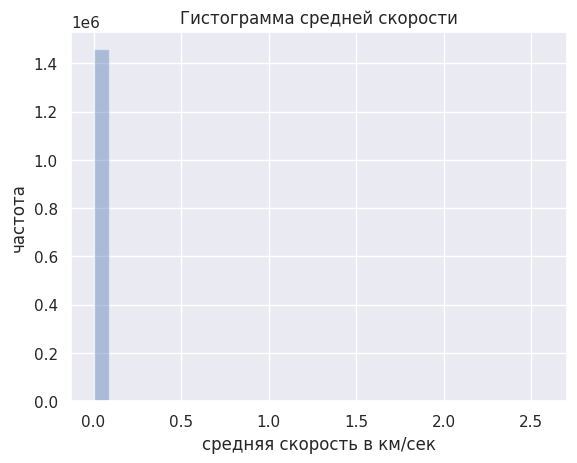

In [246]:
sns.distplot(data['mean_speed'], kde=False, bins=30)
plt.ylabel('частота')
plt.xlabel('средняя скорость в км/сек')
plt.title('Гистограмма средней скорости')

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<ipython-input-245-6ea9011d5fd5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mean_speed'].loc[data['mean_speed'] < 0.03], kde=False, bins=30) # где 0,03 == 120 км/ч


Text(0.5, 1.0, 'Гистограмма средней скорости')

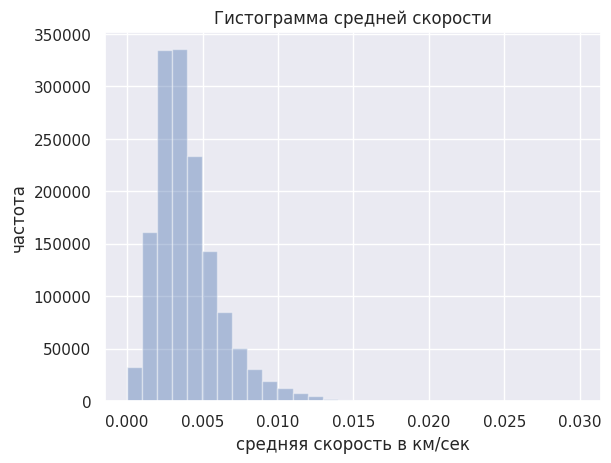

In [245]:
sns.distplot(data['mean_speed'].loc[data['mean_speed'] < 0.03], kde=False, bins=30) # где 0,03 == 120 км/ч
plt.ylabel('частота')
plt.xlabel('средняя скорость в км/сек')
plt.title('Гистограмма средней скорости')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-262-639f9f546f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'] = df['pickup_datetime'].dt.strftime("%H")
<ipython-input-262-639f9f546f49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days'] = df['pickup_datetime'].dt.strftime("%A")


<Axes: xlabel='days', ylabel='hours'>

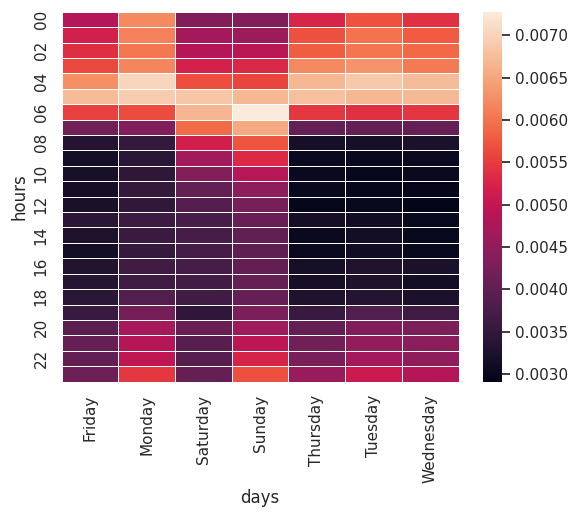

In [262]:
df = data[['pickup_datetime', 'mean_speed']]
df['hours'] = df['pickup_datetime'].dt.strftime("%H")
df['days'] = df['pickup_datetime'].dt.strftime("%A")
piv = pd.pivot_table(df, values="mean_speed",index=["hours"], columns=["days"], fill_value=0)
sns.heatmap(piv, linewidths=.5)


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?



---
Потому что это читерство\
Значение времени поездки обратно пропорционально скорости, а для обучения модели нельзя брать данные, от которых на прямую зависит ответ


---



In [263]:
data = data.drop(columns=['mean_speed'])

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.


---

Скорость максимальна в утренние часы и выходные дни, минимальна в рабочее время

---



Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):



---

Количество пробок также зависит от количества машин на дороге, поэтому эти признаки можны выделить из графика, который был построен в прошлой части


---



In [265]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
log_trip_duration            float64
haversine                    float64
log_haversine                float64
week_day                       int64
hour                          object
dtype: object

In [270]:
data['hour'] = data['hour'].astype (str).astype (int)
data['busy_roads'] = data.where(((((7 < data['hour']) & (data['hour'] < 15))) & (0 < data['week_day'] < 6)) | ((18 < data['hour'] < 21) & (0 < data['week_day'] < 7)), 'busy', 'free')

ValueError: ignored

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.